# Experiment 2
Perform Data Preprocessing like outlier detection, handling missing value, analyzing redundancy
and normalization on Wisconsin Breast Cancer Detection Dataset.

**Submitted by:** Ramansh Grover (2K18/CO/281, ML C1-G3)

In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'], ['target']))
y = df.target #predictions

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## Exploratory Data Analysis (EDA)

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


**Observations:** Ten features (dependant variables) were computed for each cell nucleus: radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. In addition, mean, standard error (se), and largest (“worst”) mean of the were also registered for each feature.

Data are distributed in a wide range, therefore, features were standardized before their visualization, so they have a mean of ‘0’ and a standard deviation of ‘1’.

In [5]:
print("Cancer data set dimensions : {}".format(df.shape))

Cancer data set dimensions : (569, 31)


1.0    357
0.0    212
Name: target, dtype: int64

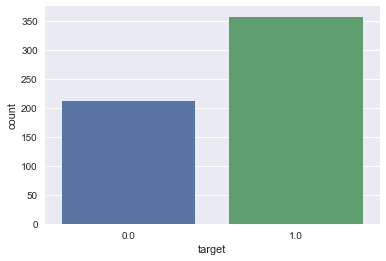

In [6]:
# 0: the cancer diagnosis is malignant, 
# 1: the cancer diagnosis is benign.

sns.set(style="darkgrid")
ax = sns.countplot(x="target", data=df)
df['target'].value_counts()

**Observations:** Data Imbalance

## Checking for missing values

In [7]:
df.isnull().sum()
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

**Observations:** No missing values found.

## Data Scaling & Normalization

In [8]:
col_names = df.columns

mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df)
df_mm = pd.DataFrame(df_mm, columns=col_names)

In [9]:
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(df)

df_r = pd.DataFrame(df_r, columns=col_names)

In [10]:
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)

df_s = pd.DataFrame(df_s, columns=col_names)

In [11]:
n_scaler = preprocessing.Normalizer()
df_n = n_scaler.fit_transform(df)

df_n = pd.DataFrame(df_n, columns=col_names)

Upon distribution EDA, MinMaxScaler doesn't distort the distances between the values in each feature. Hence, It is picked.

## Data Correlation & Redundancy Analysis

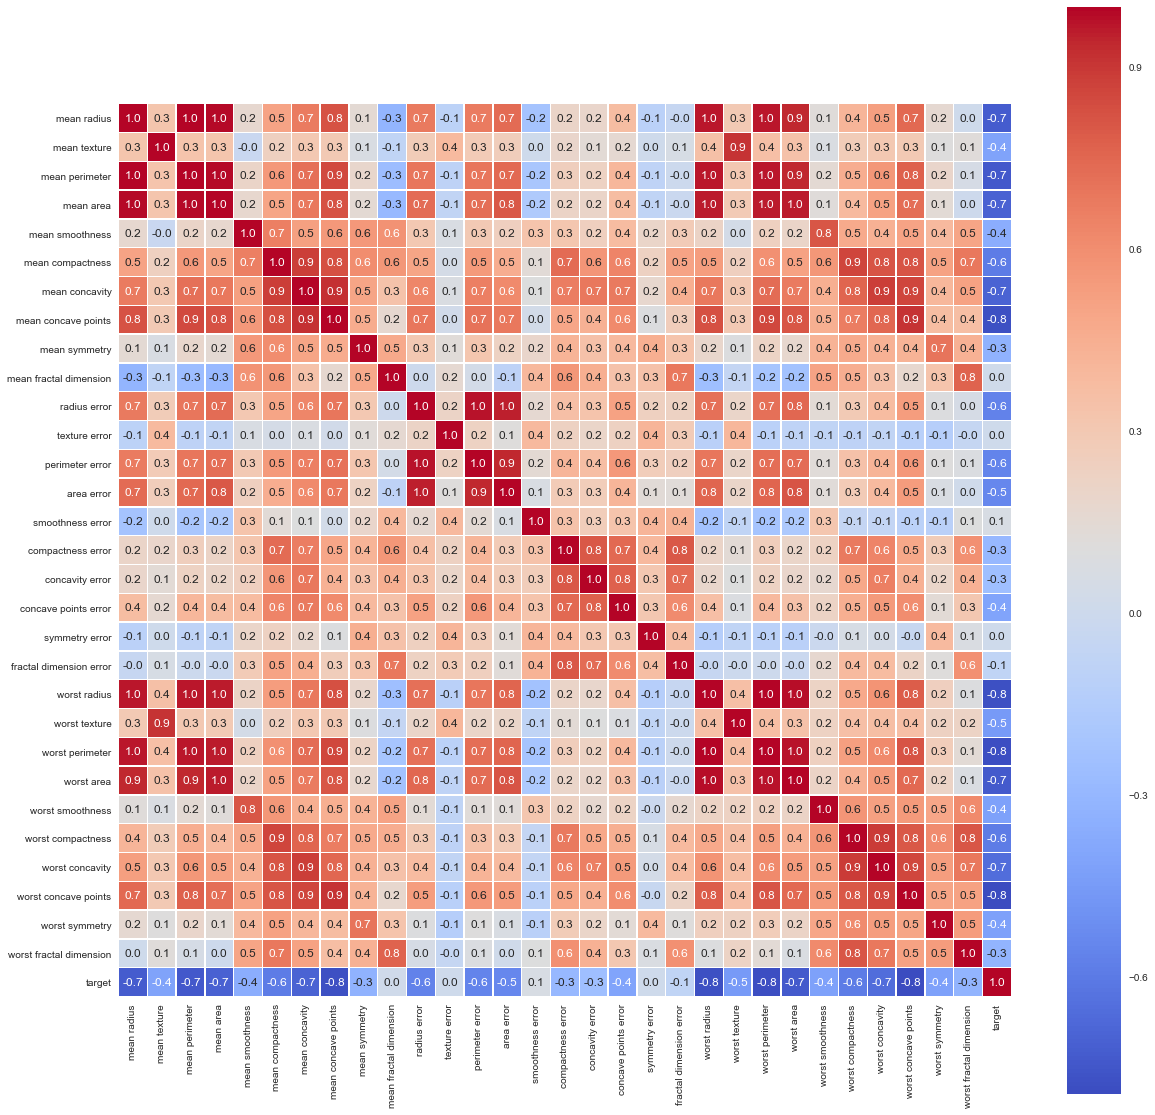

In [12]:
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax);

Finding un-correlated variables via Pearson correlation coefficient between two arrays

In [13]:
def pearson_r(x, y):
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for 'radius_mean', 'symmetry_mean'
r1 = pearson_r(df['mean radius'], df['mean perimeter'])
r2= pearson_r(df['mean radius'], df['mean symmetry'])

name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(df.iloc[:,1], df.iloc[:,j])
        if abs(r) >= 0.80 and df.columns[j]  not in name_c:
                    name_c.append(df.columns[j]) 
print()
print('Length of columns assuming r >=0.80:', len(name_c)) 
print('name_c =',name_c)


Length of columns assuming r >=0.80: 2
name_c = ['mean texture', 'worst texture']


In [14]:
name_c = []
for (i,j) in zip(range(1,31),range(1,31)):
        r = pearson_r(df.iloc[:,1], df.iloc[:,j])
        if abs(r) <= 0.40 and df.columns[j]  not in name_c:
                    name_c.append(df.columns[j])
                            
print('* Lenght of columns assuming r <=0.40:', len(name_c)) 
print('name_c =',name_c) 

* Lenght of columns assuming r <=0.40: 27
name_c = ['mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


**What do correlations imply?**

/Users/ramanshgrover/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


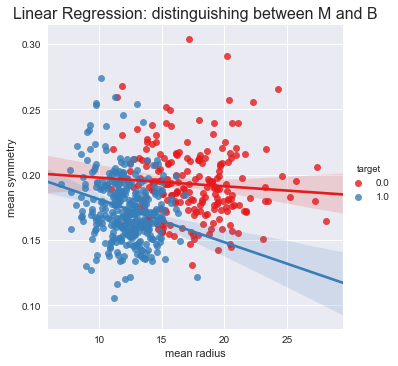

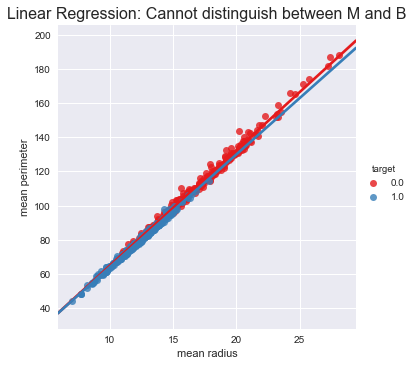

In [15]:
sns.lmplot(x='mean radius', y= 'mean symmetry', data = df, hue ='target', 
           palette='Set1')
plt.title('Linear Regression: distinguishing between M and B', size=16)


sns.lmplot(x='mean radius', y= 'mean perimeter', data = df, hue ='target', 
           palette='Set1')
plt.title('Linear Regression: Cannot distinguish between M and B', size=16);

**Observations:** Uncorrelated data is potentially more useful since it's discrimentory.

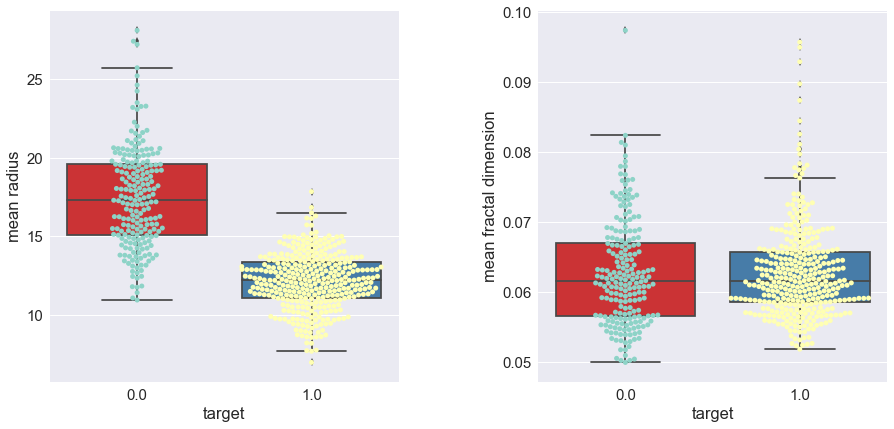

In [16]:
plt.figure(figsize=(15,15))
sns.set_context('notebook', font_scale=1.5)
plt.subplot(2, 2, 1)
sns.boxplot(y="mean radius", x="target", data=df, palette="Set1") 
sns.swarmplot(x="target", y="mean radius",data=df, palette="Set3", dodge=True)
plt.subplot(2, 2, 2)  
sns.boxplot(y="mean fractal dimension", x="target", data=df, palette="Set1")
sns.swarmplot(x="target", y="mean fractal dimension",data=df, palette="Set3",
              dodge=True)
plt.subplots_adjust(wspace=0.4);

**Observations:** The bloxblot and swarm plots below show that malignant and benign tumors have almost the same measures of fractal_dimension_mean, while radius_mean provides more information for classification.

## Outlier Detection
### 1. Isolation Forest 

In [17]:
to_model_columns = df.columns[1:32] #specify the 31 metrics column names to be modelled
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(df[to_model_columns])
pred = clf.predict(df[to_model_columns])
df['anomaly'] = pred
outliers = df.loc[df['anomaly']==-1]
outlier_index=list(outliers.index)
# print(outlier_index)
#Find the number of anomalies and normal points. Here, points classified -1 are anomalous
print(df['anomaly'].value_counts())

 1    500
-1     69
Name: anomaly, dtype: int64


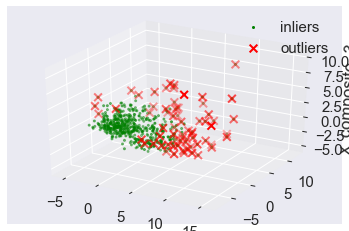

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

#normalize the metrics
X = scaler.fit_transform(df[to_model_columns])
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")

# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

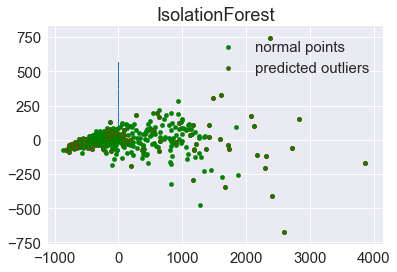

In [19]:
pca = PCA(2)
pca.fit(df[to_model_columns])
res = pd.DataFrame(pca.transform(df[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf(Z, cmap = plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20, label="normal points")
b1 =plt.scatter(res.iloc[outlier_index, 0], res.iloc[outlier_index, 1], c='green', s=20, edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

**Observations:** Implies the dataset has 69 anomalous outliers.

### 2. One-Class SVM

In [20]:
svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.6)
print(svm)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.001, kernel='rbf',
            max_iter=-1, nu=0.6, shrinking=True, tol=0.001, verbose=False)


In [21]:
x = np.array(df)
svm.fit(x)
pred = svm.predict(x)
scores = svm.score_samples(x)
thresh = np.quantile(scores, 0.03)
print(thresh)

1.000010213762111


In [22]:
index = np.where(scores<=thresh)
values = x[index]

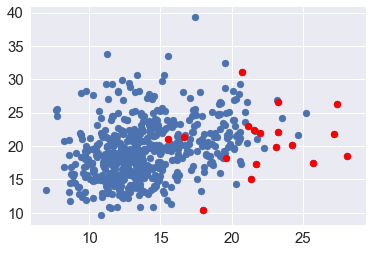

In [23]:
plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='r')
plt.show()

**Observations:** Therefore, isolation forest is picked for outlier/anomaly detection as it finds more outliers correctly.